Prepared by:

Ufuk Cem Birbiri

ufuk.birbiri@gmail.com



#Minimum Cost Flow problem using OR-Tools and Networkx

This example demonstrates an example of minimizing the total weekly costs and optimization of steak flow from Argentina and Japan to serve three markets(M1, M2, M3) in Europe. This example is taken from HelloFresh.

**What is minimum cost flow?**

The minimum-cost flow problem (MCFP) is an optimization and decision problem to find the cheapest possible way of sending a certain amount of flow through a flow network. A typical application of this problem involves finding the best delivery route from a factory to a warehouse where the road network has some capacity and cost associated.

The min-cost flow problem also has special nodes, called supply nodes or demand nodes, which are similar to the source and sink in the max flow problem. Material is transported from supply nodes to demand nodes.

- At a supply node, a positive amount — the supply — is added to the flow. A supply could represent production at that node, for example.
- At a demand node, a negative amount — the demand — is taken away from the flow. A demand could represent consumption at that node, for example.

Here, I will show an example of a Minimising the total weekly costs and two solutions implemented with OR-Tools and Networkx library

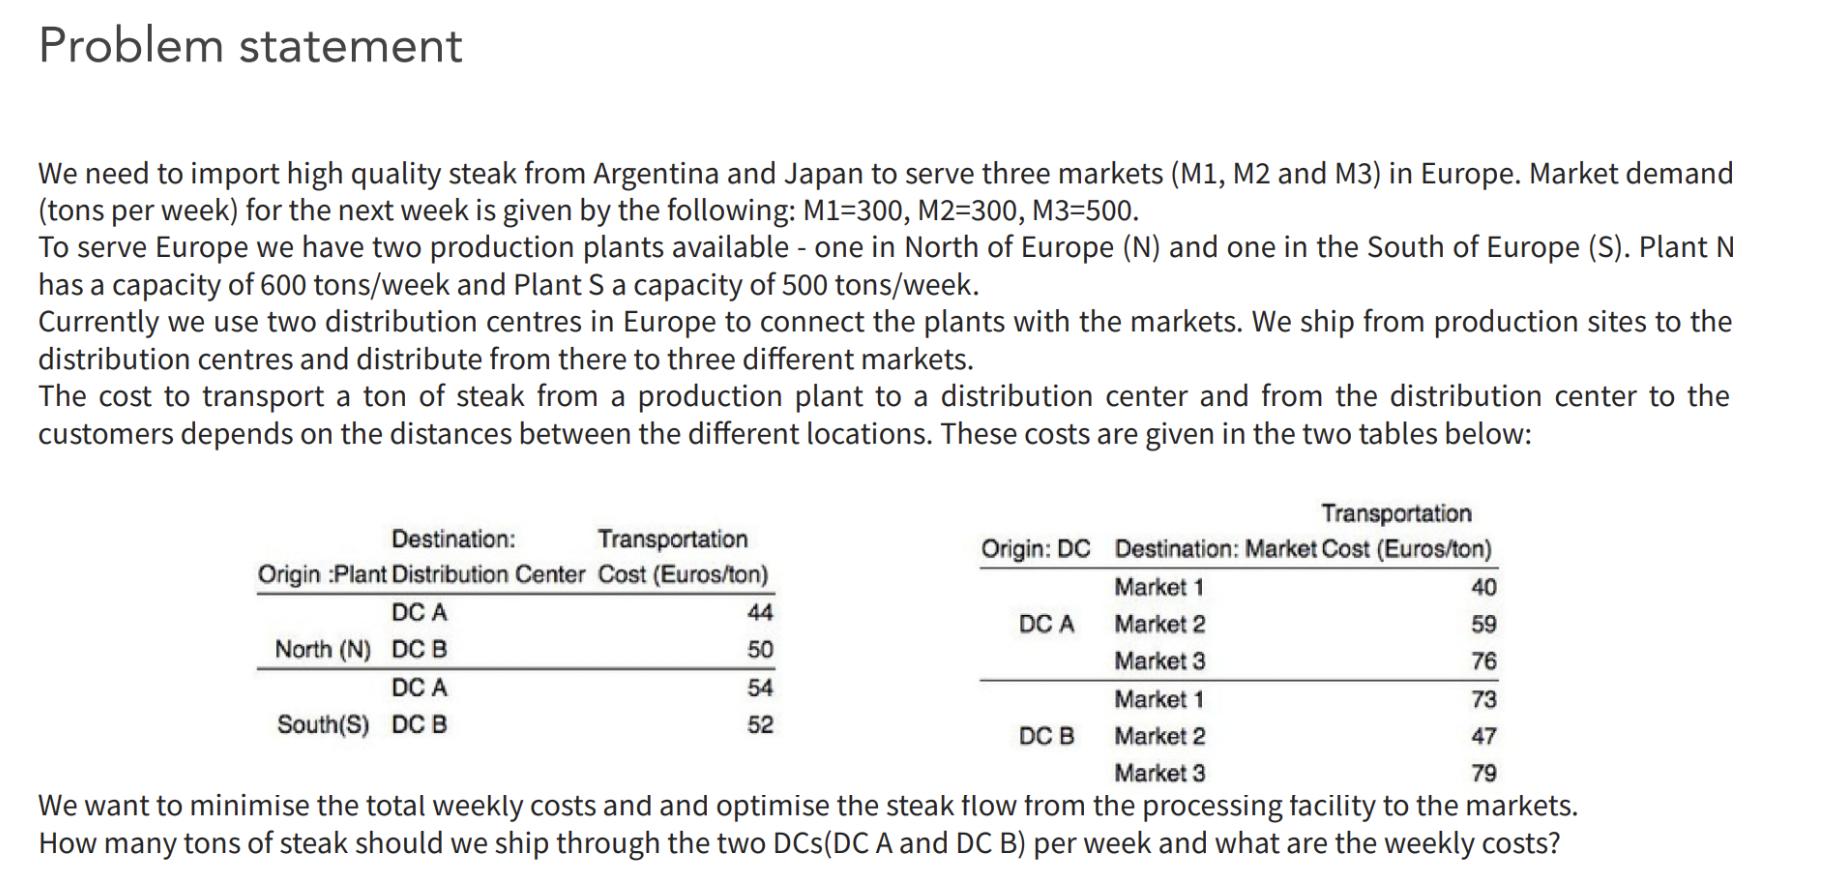

#1- Using OR-Tools

We need to install to OR-Tool library first. To use it in Google Colab, we need to install an old version(version = 7.5.7466) of OR-Tools.



In [ ]:
!pip install ortools==7.5.7466

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Then we define the sources, distributors and unit costs



In [ ]:
#Sources
start_nodes = [ 1, 1, 2, 2, 3, 3, 3, 4, 4, 4]
#Distributors centers:
end_nodes   = [ 3, 4, 3, 4, 5, 6, 7, 5, 6, 7]
#Costs
unit_costs  = [ 44, 50, 54, 52, 40, 59, 76, 73, 47, 79]

Our problem does not have a given capacity limit for the links, we will therefore use a very large number instead. Unfortunately, OR-Tools does not give us the option to define an arc without providing a capacity.

In [ ]:
capacity = 9999999

Let's define the supply values for each node.

In [ ]:
supplies = [600, 500, 0, 0, -300, -300, -500]

In [ ]:
list(range(1, len(start_nodes)+1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In OR-Tools, the SimpleMinCostFlow() functions solve the problem directly.



In [ ]:
import ortools
import ortools.graph.pywrapgraph

model = ortools.graph.pywrapgraph.SimpleMinCostFlow()

# Add each arc.
for i in range(len(start_nodes)):
    model.AddArcWithCapacityAndUnitCost(start_nodes[i], end_nodes[i],capacity, unit_costs[i])

for i in range(len(supplies)):
    model.SetNodeSupply(i+1, supplies[i])

Then solve the model and print the flow.



In [ ]:
model.Solve()

print('Minimum cost:', model.OptimalCost())
print('')
for i in range(model.NumArcs()):
    print(f'{model.Tail(i)}->{model.Head(i)} \t Flow: {model.Flow(i)}')

Minimum cost: 116900

1->3 	 Flow: 600
1->4 	 Flow: 0
2->3 	 Flow: 200
2->4 	 Flow: 300
3->5 	 Flow: 300
3->6 	 Flow: 0
3->7 	 Flow: 500
4->5 	 Flow: 0
4->6 	 Flow: 300
4->7 	 Flow: 0


We can see the sources and distributer centers as well as the minimum cost flow between each of them. The minimum cost of the whole flow is 116900.



#2- Using Networkx

Firstly, import some libraries



In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

We define the sources, distributers, and markets as nodes and weekly costs as edges in a Networkx graph. Then we visualize the flow.

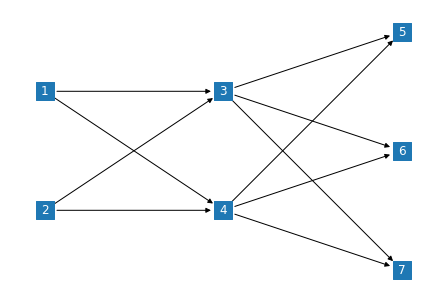

In [ ]:
#Create a dircted graph:
G = nx.DiGraph()

#Sources:
G.add_node(1, demand=-600) #North
G.add_node(2, demand=-500) #South

#Distributors:
G.add_node(3) #Distribution center A
G.add_node(4) #Distribution center B

#Markets
G.add_node(5, demand=300) #M1
G.add_node(6, demand=300) #M2
G.add_node(7, demand=500) #M3

#add edges
G.add_edge(1, 3, weight=44) # N -> DCA
G.add_edge(1, 4, weight=50) # N -> DCB

G.add_edge(2, 3, weight=54) # S -> DCA
G.add_edge(2, 4, weight=52) # S -> DCB

G.add_edge(3, 5, weight=40) # DCA -> M1
G.add_edge(3, 6, weight=59) # DCA -> M2
G.add_edge(3, 7, weight=76) # DCA -> M3

G.add_edge(4, 5, weight=73) # DCB -> M1
G.add_edge(4, 6, weight=47) # DCB -> M2
G.add_edge(4, 7, weight=79) # DCB -> M3

node_pos = {1:(1,2),2:(1,1),3:(2,2),4:(2,1),5:(3,2.5),6:(3,1.5),7:(3,0.5)}

#Let's plot our graph:
nx.draw(G, node_pos, with_labels = True, font_color = 'white', node_shape='s')

The network_simplex() function is used to solve this optimization problem.

We can directly see the minimum weekly costs from sources to market as output.



In [ ]:
# SOLUTION
flowCost, flowDict = nx.network_simplex(G)

print('SOLUTION:')
for key_i, inner_dict in flowDict.items():
    for key_j, inner_val in inner_dict.items():
        print(f'\t\tFlow in link ({key_i},{key_j}) = {inner_val}')

print('\n') # Prints a blank line
print(f'Minimum cost: {flowCost}')

SOLUTION:
		Flow in link (1,3) = 600
		Flow in link (1,4) = 0
		Flow in link (2,3) = 200
		Flow in link (2,4) = 300
		Flow in link (3,5) = 300
		Flow in link (3,6) = 0
		Flow in link (3,7) = 500
		Flow in link (4,5) = 0
		Flow in link (4,6) = 300
		Flow in link (4,7) = 0


Minimum cost: 116900


**CONCLUSION**

The minimum-cost flow is a common optimization problem in supply chain flows where we minimize the cost from supply centers(sources) to markets(demands). I demonstrated two approaches to solve this problem using OR-Tools and Networkx library in Python.